# STAT 207 Lab 9 - Individual Part - [25 total points]

## Multiple Linear Regression, ANOVA, and Logistic Regression

Due: Tuesday, October 26 11:59pm CST

## <u>Dataset</u>: Seattle Airbnb Dataset

The following dataset is a **random sample** of available Airbnb listings in Seattle, WA. These listings were collected in January 2016, and filtered to just contain listings from the five most popular Seattle neighborhoods (for Airbnb listings) and just contain listings that are either in a house or apartment property. Rows with missing values have already been dropped from the dataset.

Suppose that you work as a data scientist at Airbnb. You'd like to learn more about the relationship between various variables in this dataset. We will work on several different case studies with this dataset in this assignment.

This dataset contains the following variables.

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night)(in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>:how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept



<p>&nbsp;</p>
<table style="border: none;border-collapse: collapse;width:102pt;">
    <tbody>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;width:51pt;">Problem</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:general;vertical-align:bottom;border:.5pt solid windowtext;border-left:none;width:51pt;">Points</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">2.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">2.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.4.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">7.4.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.5.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">8.5.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
    </tbody>
</table>





### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Data Processing and Cleaning

First, read the seattle_airbnb_listings_cleaned.csv file into a dataframe. This csv file does not contain any missing values.

In [3]:
df = pd.read_csv('seattle_airbnb_listings_cleaned.csv')

In [4]:
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


<hr>

## <u>Case Study A</u>: Association between the Airbnb Price and the Neighborhood the Listing is Located In

## 2. Associations in the Dataset

First,  we would like to examine whether there is a relationship between the five different neighborhoods **in this dataset** and the price of the Airbnb listings.

### 2.1. Average Price by Neighborhood

First, calculate the average price of an Airbnb listing in each of the five neighborhoods. For full credit, you should calculate these five averages in just one line of code.


In [5]:
df[['neighborhood', 'price']].groupby(['neighborhood']).mean()

,price
neighborhood,
Belltown,153.859649
Broadway,115.175000
Fremont,160.382979
Minor,140.326531
Wallingford,123.833333


#### 2.2. Airbnb Price Distribution by Neighborhood

Next, plot a side-by-side boxplots plot, visualizing the relationship between the listing price and the 5 neighborhoods in this dataset.

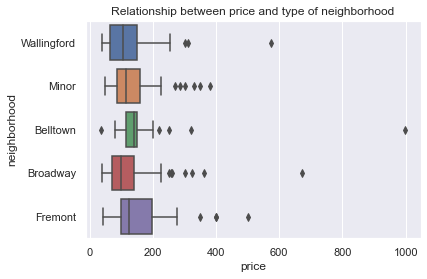

In [6]:
sns.boxplot(x="price", y='neighborhood', data=df)
plt.title('Relationship between price and type of neighborhood')
plt.show()

## 3. Associations in the Population of *All Seattle Airbnb Properties from the Top 5 Neighborhoods* - with ANOVA

Next, we would like to determine if an association for ALL Seattble Airbnb listings between the price and the top 5 most popular Seattle neighborhoods. Specifically, we would like to test this association by assessing if we have enough evidence to suggest that at least two neighbhorood average Airbnb prices are different from each other. The averages that you are considering in this case will be:
* $\mu_{Wallingford}$ = the average listing price of *all* Airbnb properties in Wallingford
* $\mu_{Minor}$ = the average listing price of *all* Airbnb properties in Minor
* $\mu_{Belltown}$ = the average listing price of *all* Airbnb properties in Belltown
* $\mu_{Broadway}$ = the average listing price of *all* Airbnb properties in Broadway
* $\mu_{Fremont}$ = the average listing price of *all* Airbnb properties in Fremont


### 3.1. Hypotheses

First, set up the hypotheses for this test. Make sure that you use the correct notation.

$H_0:\quad \mu_{Wallingford} = \mu_{Minor} = \mu_{Belltown} = \mu_{Broadway}= \mu_{Fremont}$

$H_A:$ at least two neighbhorood average Airbnb prices are different from each other.


### 3.2. Test Statistic and p-value

Next, find the test statistic and the p-value that correspond to this hypothesis test.

In [8]:
price_neighbor = smf.ols('price ~ neighborhood', data=df).fit()
price_neighbor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.180
Date:                Tue, 26 Oct 2021   Prob (F-statistic):             0.0139
Time:                        21:29:06   Log-Likelihood:                -2009.3
No. Observations:                 339   AIC:                             4029.
Df Residuals:                     334   BIC:                             4048.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     153.8596     12.110     12.706      0.000     130.039     177.680
neighborhood[T.Broadway]      -38.6846     14.707     -2.630      0.009     -67.615      -9.754
neighborhood[T.Fremont]         6.5233     18.014      0.362      0.717     -28.911      41.958
neighborhood[T.Minor]         -13.5331     17.811     -0.760      0.448     -48.569      21.503
neighborhood[T.Wallingford]   -30.0263     16.532     -1.816      0.070     -62.545       2.493
==============================================================================
Omnibus:                      329.050   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11341.496
Skew:                           4.038   Prob(JB):                         0.00
Kurtosis:                      30.161   Cond. No.                         6.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Given to the summary, test statistics is 3.180 and p-value is 0.0139.

### 3.3. Make a conclusion

Use a significance level of $\alpha=0.05$ to make a conclusion about our hypotheses from 3.1.

since 0.0139 < 0.05, we reject the null hypothesis. Thus there is sufficient evidence to at least two neighbhorood average Airbnb prices are different from each other.

### 3.4. Type 1 Error Probability

In our hypothesis test conducted in 3.1-3.3, what is the probability that the null value is actually true, but we incorrectly reject it?

<hr>

## <u>Case Study B</u>: Association between Airbnb Price and Multiple Explanatory Variables - Multiple Linear Regression

Next, we would like to build a multiple linear regression model that predicts the **price** of a Seattle Airbnb listing using several explanatory variables.





## 4. Descriptive Analytics

### 4.1. Interaction between Accommodation Number, Price, and Property Type
First, let's analyze the relationship between the number of people that the Airbnb property accommodates and the price of the listing. Plot a scatterplot for these two numerical variables below (you should put price on the y-axis). Also in this scatterplot, color-code your points by the property type that this property corresponds to. Finally, fit a best fit line for each of the two different property types in this scatterplot.

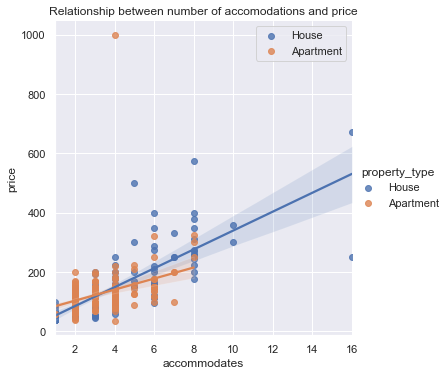

In [12]:
sns.lmplot(x="accommodates",y='price', hue='property_type', data=df)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Relationship between number of accomodations and price')
plt.show()

### 4.2. Interpretation

Does this plot above indicate that there may be an interaction between the property type and the number of people that can be acommodated in an Airbnb listing in a regression model that predicts price? Explain.

* <u>Intercept Comparison</u>: It looks like the intercept of Apartment best fit line is higher than the intercept for House best fit line. 
* <u>Slope Comparison</u>: It looks like the slope of the House best fit line is slightly higher than the slope for the Apartment best fit line. 

Therefore, we may predict that for house there's slightly greater increase of price when accomodations increase, but apartment will be slightly more expensive when small number (<=3) of people accomodates.

## 5. Linear Regression Model

Next, let's build a multiple linear regression model that predicts the **price** of a Seattle Airbnb listing using the following explanatory variables.
* accommodates,
* beds,
* bathrooms,
* property_type,
* room_type, and
* an interaction term between property type and accommodates.


### 5.1. Model Fitting
Fit this model below display the summary output table for the fitted model.

In [30]:
results = smf.ols(formula='price ~ accommodates+beds+bathrooms+property_type+room_type+property_type*accommodates', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     43.29
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           3.32e-43
Time:                        22:52:33   Log-Likelihood:                -1905.4
No. Observations:                 339   AIC:                             3827.
Df Residuals:                     331   BIC:                             3857.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              48.5121     13.833      3.507      0.001      21.300      75.724
property_type[T.House]                -13.5063     17.834     -0.757      0.449     -48.588      21.576
room_type[T.Private room]             -48.0473     12.803     -3.753      0.000     -73.233     -22.862
room_type[T.Shared room]              -34.8066     17.792     -1.956      0.051     -69.806       0.193
accommodates                           16.9275      4.301      3.936      0.000       8.466      25.389
property_type[T.House]:accommodates     7.1134      4.227      1.683      0.093      -1.201      15.428
beds                                   -6.9700      6.114     -1.140      0.255     -18.998       5.058
bathrooms                              35.7682      8.928      4.006      0.000      18.206      53.330
==============================================================================
Omnibus:                      476.383   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91231.191
Skew:                           6.725   Prob(JB):                         0.00
Kurtosis:                      82.234   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Model Conditions Checking, Fixing, and Transformations

Next, we would like to check the conditions for conducting inference on the population slopes in the corresponding population regression model. 


### 6.1. Initial Model Condition Checking
Check the corresponding conditions for inference below.

**<u>Condition 1</u>: Linearity Condition**

Because the distribution of points in the plot below are roughly evenly distributed above and below the line as we move from left to right, we can say the linearity condition is met.

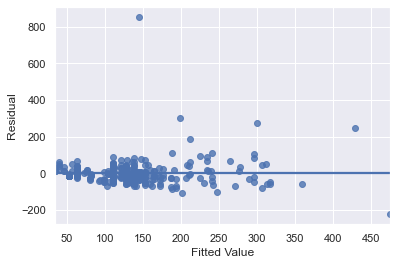

In [31]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 2</u>: Constant Variability of Residuals Condition**

Because the y-axis spread of points in the plot below slightly change as we move from left to right, we can say that this condition is slightly not met.

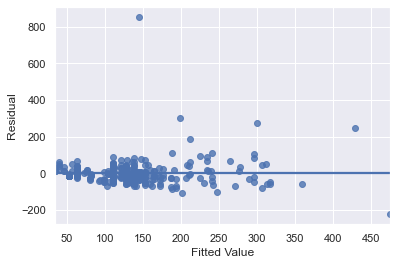

In [32]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

**<u>Condition 3</u>: Normality of Residuals (with Mean of 0) Condition**

Because the histogram of residuals is slightly skewed to the right, the assumption that the residuals are normally distributed is slightly not met.

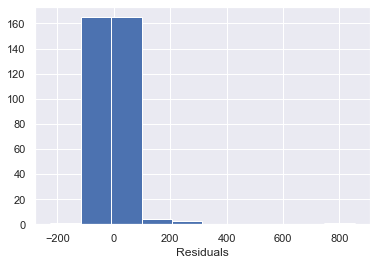

In [33]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4 Independence of Residuals Condition

At the very least, we verify that:

the data is randomly sampled and
the sample size n=339<10% of all Airbnb listings in Seattle
Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent.


In [34]:
df.shape[0]

339

Condition 5: No Multicollinearity Condition

Let's take a look at the relationships between each pair of numerical explanatory variables. 

We see that there is a pretty strong linear relationship between the explanatory variables and price. Thus the multicollinearity condition is violated.

### 6.2. Deleting a Numerical Explanatory Variable from the Model

If you had to delete one of the three numerical explanatory variables from the model, which one would you pick? Use the $R^2$ to help make your decision.

*You would still keep the accommodate and property type interaction variable in your model though*.

R square is 0.467

In [37]:
results = smf.ols(formula='price ~ accommodates+bathrooms+property_type+room_type+property_type*accommodates', data=df).fit()
print('R^2 for the model without beds:',results.rsquared)

R^2 for the model without beds: 0.47592081625200433


In [38]:
results = smf.ols(formula='price ~ accommodates+beds+property_type+room_type+property_type*accommodates', data=df).fit()
print('R^2 for the model without bathrooms:',results.rsquared)

R^2 for the model without bathrooms: 0.4526541100492206


In [39]:
results = smf.ols(formula='price ~ beds+bathrooms+property_type+room_type+property_type*accommodates', data=df).fit()
print('R^2 for the model without accomodates:',results.rsquared)

R^2 for the model without accomodates: 0.47797023894981516


Beds can be deleted

### 6.3. Response Variable Transformation and Variable Deletion

In attempt to have our conditions for inference met, let's build a new linear regression model predicts the **ln(price)** of a Seattle Airbnb listing using the following explanatory variables.
* accommodates,
* bathrooms,
* property_type,
* room_type, and
* an interaction term between property type and accommodates.

*Note that we are no longer considering the beds variable as an explanatory variable in our model.*

#### 6.3.1. Model Fitting
Fit this model below and display the summary output table for the fitted model.

In [41]:
df['price']=np.log(df['price'])

df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,1.741130,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,1.610227,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,1.515979,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,1.537719,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,1.597698,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


In [44]:
price_result = smf.ols('price ~ accommodates+bathrooms+property_type+room_type+property_type*accommodates', data=df).fit()
price_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     112.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           7.84e-77
Time:                        22:57:18   Log-Likelihood:                 447.73
No. Observations:                 339   AIC:                            -881.5
Df Residuals:                     332   BIC:                            -854.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.4677      0.013    110.059      0.000       1.441       1.494
property_type[T.House]                  0.0276      0.017      1.608      0.109      -0.006       0.061
room_type[T.Private room]              -0.1221      0.012     -9.901      0.000      -0.146      -0.098
room_type[T.Shared room]               -0.1897      0.017    -11.185      0.000      -0.223      -0.156
accommodates                            0.0180      0.003      5.426      0.000       0.011       0.025
property_type[T.House]:accommodates    -0.0023      0.004     -0.568      0.571      -0.010       0.006
bathrooms                               0.0374      0.009      4.346      0.000       0.020       0.054
==============================================================================
Omnibus:                       27.923   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.491
Skew:                           0.422   Prob(JB):                     4.44e-14
Kurtosis:                       4.908   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 6.3.2. New Model Condition Checking
Check the corresponding conditions for inference for this new model below.

Condition 1: Linearity Condition

The distribution of points in the plot below are now roughly evenly distributed above and below the line as we move from left to right, therefore we can say the linearity condition is met.



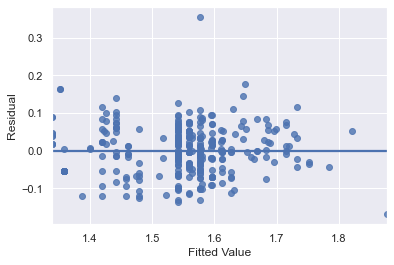

In [45]:
sns.regplot(x=price_result.fittedvalues, y=price_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 2: Constant Variability of Residuals Condition

The y-axis spread of points in the plot below as we move from left to right now changes very little, thus we can now say that this condition is met.

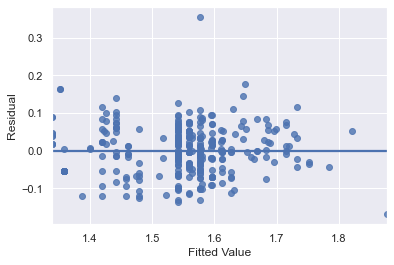

In [46]:
sns.regplot(x=price_result.fittedvalues, y=price_result.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Condition 3: Normality of Residuals (with Mean of 0) Condition

Because the histogram of residuals is symmeric and unimodal and centered at 0, we can assume that the distribution of the residuals is normal with a mean of 0.



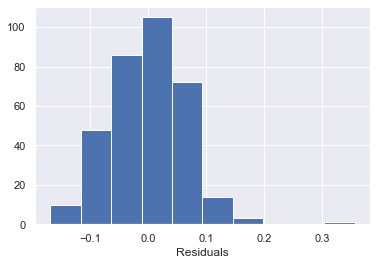

In [47]:
plt.hist(price_result.resid)
plt.xlabel('Residuals')
plt.show()

Condition 4 Independence of Residuals Condition

At the very least, we verify that:

the data is randomly sampled and
the sample size n=339<10% of all car models from the 70's and 80's
Thus the condition for independence of residuals may not be violated in this particular way.

However, it may still be the case that these residuals are not independent.

In [49]:
df.shape[0]

339

Condition 5: No Multicollinearity Condition

This is a simple linear regression model (which only has one explanatory variable), thus we do not need to check this condition.

## 7. Transformed Model

Let's use our model from #6 for further evaluation.


### 7.1. Model Predictive Power

Which model was able to explain more of the response variable variability: the original model from #5 or the transformed model from #6? Explain.

The second model is better.

### 7.2. Model Equation

Write out your fitted regression model from #6. Make sure to use the appropriate notation discussed in class.

In [50]:
price_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     112.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           7.84e-77
Time:                        23:02:22   Log-Likelihood:                 447.73
No. Observations:                 339   AIC:                            -881.5
Df Residuals:                     332   BIC:                            -854.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.4677      0.013    110.059      0.000       1.441       1.494
property_type[T.House]                  0.0276      0.017      1.608      0.109      -0.006       0.061
room_type[T.Private room]              -0.1221      0.012     -9.901      0.000      -0.146      -0.098
room_type[T.Shared room]               -0.1897      0.017    -11.185      0.000      -0.223      -0.156
accommodates                            0.0180      0.003      5.426      0.000       0.011       0.025
property_type[T.House]:accommodates    -0.0023      0.004     -0.568      0.571      -0.010       0.006
bathrooms                               0.0374      0.009      4.346      0.000       0.020       0.054
==============================================================================
Omnibus:                       27.923   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.491
Skew:                           0.422   Prob(JB):                     4.44e-14
Kurtosis:                       4.908   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
price_result.params

Intercept                              1.467708
property_type[T.House]                 0.027620
room_type[T.Private room]             -0.122106
room_type[T.Shared room]              -0.189660
accommodates                           0.017987
property_type[T.House]:accommodates   -0.002288
bathrooms                              0.037441
dtype: float64

$\hat{ln(price)}=1.467708-0.122106(room_type[T.Private room])+0.027620(property_type[T.House])-0.189660(room_type[T.Shared room])+0.017987(accommodates)-0.002288(property_type[T.House]:accommodates)+0.037441(bathrooms)$

### 7.3. Prediction

Predict the **price** of a Seattle Airbnb listing that is an apartment, where the tenant has to share a room with someone, the listings accommodates just 1 person, and the listing has 1 bathroom?

In [54]:
1.467708- 0.122106*(0)+0.027620*(0)-0.189660*(1)+0.017987*(1)-0.002288*(0)+0.037441*(1)


1.333476

In [55]:
np.exp(1.333476)

3.7942091632457258

### 7.4. Intercept and Slope Interpretation

#### 7.4.1. Intercept

Put the intercept of the regression model from #6 into words. **Make sure to use non-causal langauge in your interpretation!**

* <u>Intercept</u>: We would expect price, on average, to have a ln(price) of 1.467708. 

#### 7.4.2. Slope

Put the slope of the regression model from #6 that corresponds to accommodates into words. **Make sure to use non-causal langauge in your interpretation!**

* <u>Slope</u>: If we were to increase accommodates, we would expect the ln(price)to increase, on average, by 0.017987.
If we were to increase bathrooms, we would expect the ln(price)to increase, on average, by 0.037441.

## 8. Transformed Model Inference

Finally, (also referring to the transformed model from #6), we would like to determine if we have sufficient evidence to suggest that at least one of the slopes in our corresponding population model is non-zero.

### 8.1. Hypotheses

First, set up the hypotheses for this hypothesis test. Make sure to define any parameters that you use in your hypotheses.

$H_0: β_1=β_2=β_3=β_4=β_5=0$

$H_A:$ At least one $β_i≠0$ (for i=1,2,3,4,5)

β_1=accommodates
β_2=bathrooms
β_3=property_type
β_4=room_type
β_5=property_type*accommodates


### 8.2. Test Statistic and p-value

Give the test statistic and p-value for this hypothesis test.

In [56]:
price_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     112.3
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           7.84e-77
Time:                        23:23:18   Log-Likelihood:                 447.73
No. Observations:                 339   AIC:                            -881.5
Df Residuals:                     332   BIC:                            -854.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.4677      0.013    110.059      0.000       1.441       1.494
property_type[T.House]                  0.0276      0.017      1.608      0.109      -0.006       0.061
room_type[T.Private room]              -0.1221      0.012     -9.901      0.000      -0.146      -0.098
room_type[T.Shared room]               -0.1897      0.017    -11.185      0.000      -0.223      -0.156
accommodates                            0.0180      0.003      5.426      0.000       0.011       0.025
property_type[T.House]:accommodates    -0.0023      0.004     -0.568      0.571      -0.010       0.006
bathrooms                               0.0374      0.009      4.346      0.000       0.020       0.054
==============================================================================
Omnibus:                       27.923   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.491
Skew:                           0.422   Prob(JB):                     4.44e-14
Kurtosis:                       4.908   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

test statistic is 112.3 and p-value is 7.84e-77

### 8.3. Calculate p-value by hand

Next, using the test statistic from 8.2, calculate the p-value "by hand". You can use a scipy.stats function to help you calculate this p-value.

*Note: Your p-value in 8.3 and 8.2 may be slightly different due to rounding*.

In [58]:
from scipy.stats import f
pvalue=1-f.cdf(112.3, dfn=5,dfd=339-6)
print('p-value: ',pvalue)

p-value:  1.1102230246251565e-16


### 8.4. Conclusion

Finally, using a significance level of $\alpha=0.05$, make a conclusion about your hypotheses from 8.1.

since 7.84e-77 < 0.05, we can reject the null hypothesis.

### 8.5. Why use this hypothesis test in 8.1?


#### 8.5.1. Downside of conducting many individual hypothesis tests

Suppose instead, we were to conduct 6 separate hypothesis tests for this model:

1. $H_0: \beta_1=0; H_A: \beta_1\neq 0$
2. $H_0: \beta_2=0; H_A: \beta_2\neq 0$
3. $H_0: \beta_3=0; H_A: \beta_3\neq 0$
4. $H_0: \beta_4=0; H_A: \beta_4\neq 0$
5. $H_0: \beta_5=0; H_A: \beta_5\neq 0$
6. $H_0: \beta_6=0; H_A: \beta_6\neq 0$

For *each* of these hypothesis tests, suppose we use a significance level of $\alpha=0.05$.

What is the probability that all six of these hypothesis tests *did not* make a type 1 error? Assume that the decisions made in each of these tests are independent.

#### 8.5.2. Just one test benefit

What is the probability that we did not make a type 1 error in our hypothesis test from 8.4?